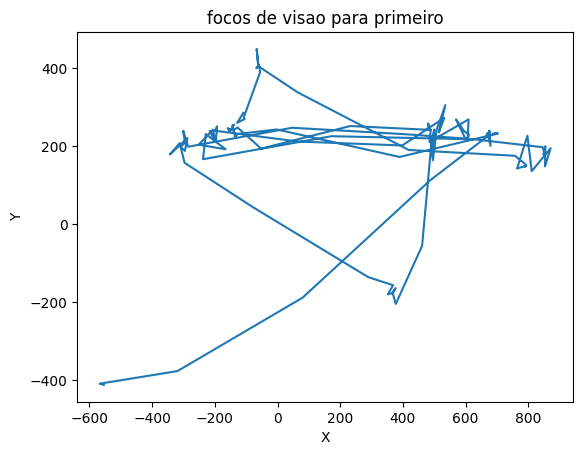

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leia os dados
data = pd.read_csv('gaze_data.txt')

# Preencher valores NaN com 0
data = data.fillna(0)
word = data.iloc[4].loc['word']
# Obtenha a resposta da linha 3 (verifique se 'response' está correto)
gaze_points = data.iloc[4].loc['response']

# Limpe a string removendo caracteres nulos ou indesejados
cleaned_gaze_points = gaze_points.replace('\x00', '').strip()

# Converta a string em um array
try:
    array = np.array(eval(cleaned_gaze_points))
except SyntaxError:
    print("Erro ao avaliar a string. Verifique o formato dos dados.")
    array = None

# Verifique se o array foi criado corretamente
if array is not None:
    # Separe as coordenadas x e y
    x_coords = array[:, 0]
    y_coords = array[:, 1]

    # Plote as coordenadas
    plt.plot(x_coords, y_coords)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'focos de visao para {word}')
    plt.show()


In [29]:
print(array[:, 0].shape)

(116,)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

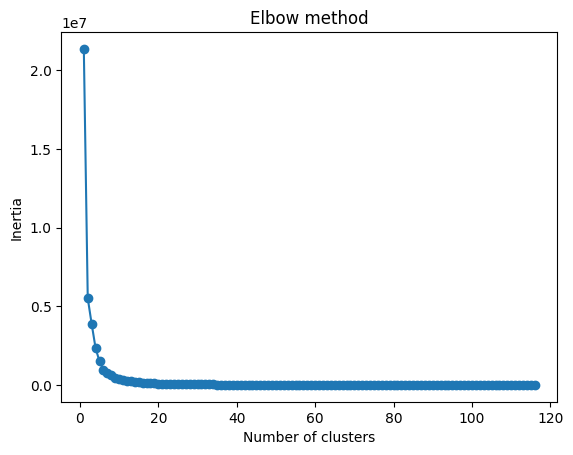

In [30]:
from sklearn.cluster import KMeans

data = list(zip(array[:, 0], array[:, 1]))
inertias = []

for i in range(1,117):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,117), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


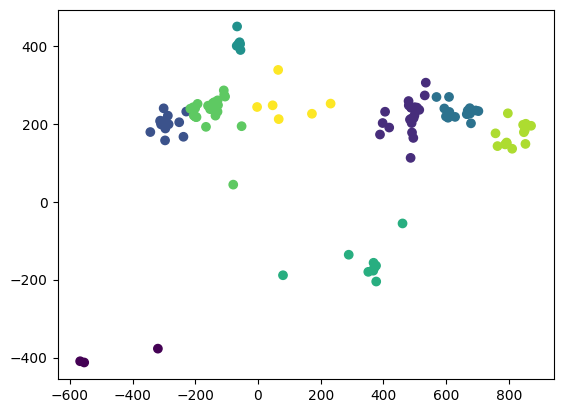

In [32]:
kmeans = KMeans(n_clusters = 9)
kmeans.fit(data)

plt.scatter(array[:, 0], array[:, 1], c = kmeans.labels_)
plt.show()

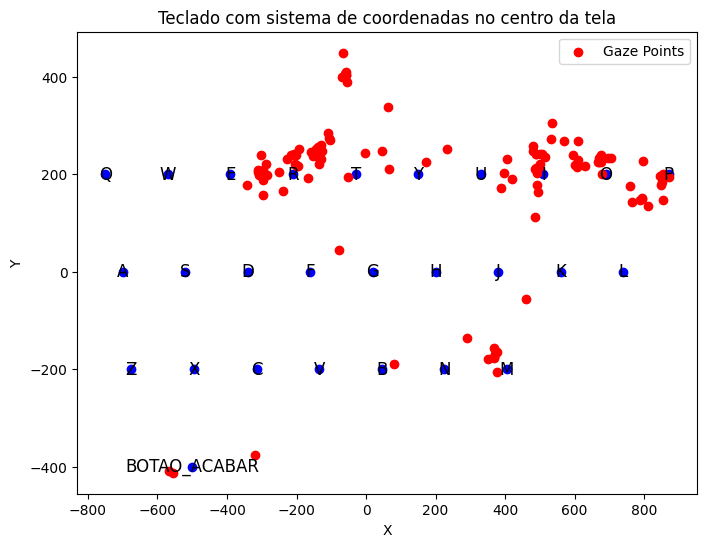

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Defina o espaçamento horizontal entre as teclas
horizontal_spacing = 180  # Ajuste esse valor conforme necessário

# Defina a posição das teclas do teclado
keys = [
    ('Q', [-350, 400]), ('W', [-350 + horizontal_spacing, 400]),
    ('E', [-350 + 2 * horizontal_spacing, 400]), ('R', [-350 + 3 * horizontal_spacing, 400]),
    ('T', [-350 + 4 * horizontal_spacing, 400]), ('Y', [-350 + 5 * horizontal_spacing, 400]),
    ('U', [-350 + 6 * horizontal_spacing, 400]), ('I', [-350 + 7 * horizontal_spacing, 400]),
    ('O', [-350 + 8 * horizontal_spacing, 400]), ('P', [-350 + 9 * horizontal_spacing, 400]),
    ('A', [-300, 200]), ('S', [-300 + horizontal_spacing, 200]),
    ('D', [-300 + 2 * horizontal_spacing, 200]), ('F', [-300 + 3 * horizontal_spacing, 200]),
    ('G', [-300 + 4 * horizontal_spacing, 200]), ('H', [-300 + 5 * horizontal_spacing, 200]),
    ('J', [-300 + 6 * horizontal_spacing, 200]), ('K', [-300 + 7 * horizontal_spacing, 200]),
    ('L', [-300 + 8 * horizontal_spacing, 200]),
    ('Z', [-275, 0]), ('X', [-275 + horizontal_spacing, 0]),
    ('C', [-275 + 2 * horizontal_spacing, 0]), ('V', [-275 + 3 * horizontal_spacing, 0]),
    ('B', [-275 + 4 * horizontal_spacing, 0]), ('N', [-275 + 5 * horizontal_spacing, 0]),
    ('M', [-275 + 6 * horizontal_spacing, 0]),
    ('BOTAO_ACABAR', [-100, -200])
]

# Ajuste as coordenadas das teclas
for key in keys:
    key[1][1] -= 200  # Move o teclado mais para baixo
    key[1][0] -= 400  # Ajuste horizontalmente

# Plotar o teclado
plt.figure(figsize=(8, 6))
for key, coord in keys:
    plt.scatter(coord[0], coord[1], color='blue')
    plt.text(coord[0], coord[1], key, fontsize=12, ha='center', va='center')

# Configurar os limites do gráfico
# plt.xlim(-600, 600)
# plt.ylim(-600, 600)

# Título e labels dos eixos
plt.title('Teclado com sistema de coordenadas no centro da tela')
plt.xlabel('X')
plt.ylabel('Y')

# Se você já tiver os gaze points no formato de array, como no exemplo anterior, plotar os gaze points:
# Exemplo: array = np.array([[x1, y1], [x2, y2], ...])
gaze_points_array = array  # Exemplo de dados dos olhos

# Plotar os gaze points (dados dos olhos)
plt.scatter(gaze_points_array[:, 0], gaze_points_array[:, 1], color='red', label='Gaze Points')

# Exibir legenda
plt.legend()

# Mostrar o gráfico
plt.show()
